# Performing Mann Whitney Test

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loss
url = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Mann%20Whitney%20U/BII_LossSamples_seed%20(1).csv"
loss_df = pd.read_csv(url)

# Remaining
url_r = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Mann%20Whitney%20U/BII_RemainSamples_seed%20(1).csv"
remain_df = pd.read_csv(url_r)

In [4]:
loss_df.describe()

,system:index,BII2020
count,468.000000,468.000000
mean,2539.179487,0.799037
std,1487.566229,0.114393
min,8.000000,0.354931
25%,1229.750000,0.742901
50%,2533.500000,0.849705
75%,3835.000000,0.864819
max,4998.000000,0.961753


In [5]:
remain_df.describe()


,system:index,BII2020
count,2219.000000,2219.000000
mean,2483.866607,0.963088
std,1435.219103,0.037952
min,1.000000,0.561829
25%,1255.500000,0.948184
50%,2468.000000,0.971367
75%,3748.000000,0.991094
max,4999.000000,1.000000


C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_11852\2076801148.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])


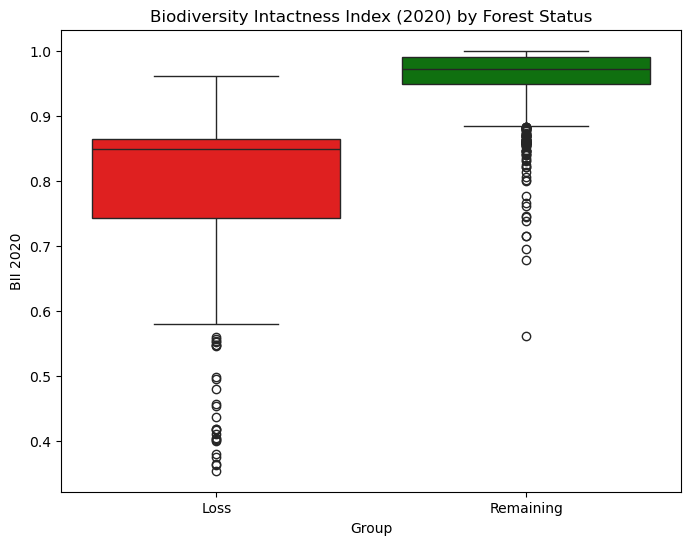

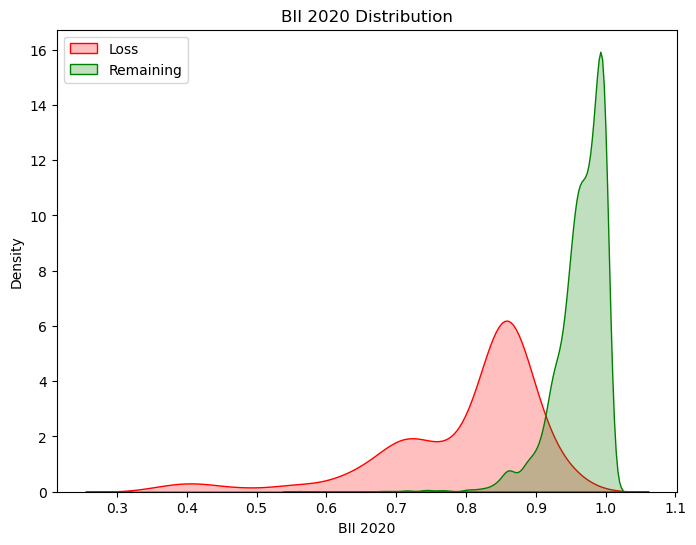

In [6]:
# Add a column to distinguish groups
loss_df['Group'] = 'Loss'
remain_df['Group'] = 'Remaining'

# Combine both datasets
combined_df = pd.concat([loss_df[['BII2020', 'Group']],
                         remain_df[['BII2020', 'Group']]])

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])
plt.title('Biodiversity Intactness Index (2020) by Forest Status')
plt.ylabel('BII 2020')
plt.show()

# Optional: plot histogram/density
plt.figure(figsize=(8,6))
sns.kdeplot(loss_df['BII2020'], label='Loss', color='red', fill=True)
sns.kdeplot(remain_df['BII2020'], label='Remaining', color='green', fill=True)
plt.title('BII 2020 Distribution')
plt.xlabel('BII 2020')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_11852\3961314747.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


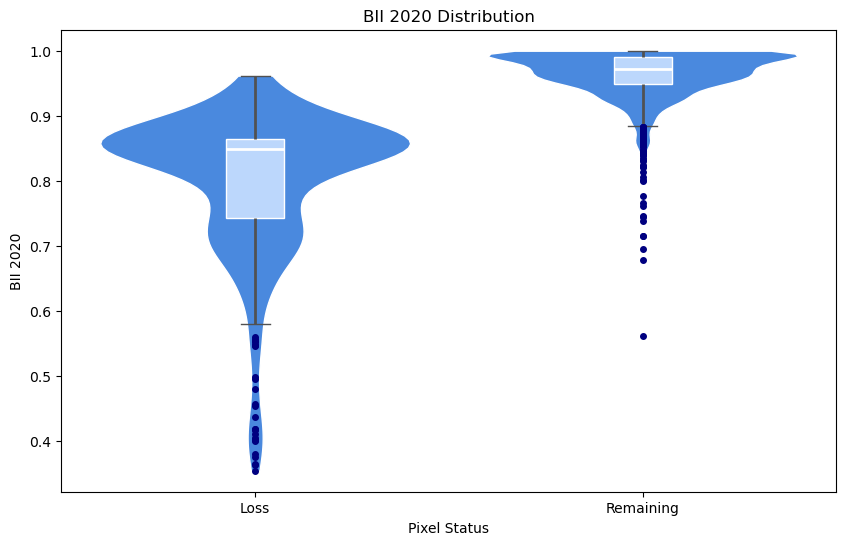

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure to create a copy and add the 'Status' column
loss_df_copy = loss_df.copy()
loss_df_copy['Status'] = 'Loss'

remain_df_copy = remain_df.copy()
remain_df_copy['Status'] = 'Remaining'

# Combine into one DataFrame
df = pd.concat([loss_df_copy, remain_df_copy], axis=0)

plt.figure(figsize=(10,6))

# Define pastel palette (valid hex codes)
pastel_palette = {'Loss': '#3186F7', 'Remaining': '#3186F7'}

# Violin plot
sns.violinplot(
    x='Status',
    y='BII2020',
    data=df,
    palette=pastel_palette,
    inner=None,
    cut=0,
    linewidth=1,          # thickness of the violin edge
    edgecolor='WHITE'     # outline color
)

# Boxplot inside
sns.boxplot(
    x='Status',
    y='BII2020',
    data=df,
    width=0.15,
    showcaps=True,
    showfliers=True,
    boxprops={'facecolor':'#BCD7FC', 'edgecolor':'white'},
    whiskerprops={'linewidth':2},
    medianprops={'color':'white', 'linewidth':2},
    flierprops={
        'marker':'o',
        'markerfacecolor':'navy',
        'markeredgecolor':'navy',
        'markersize':4
    }
)

plt.title('BII 2020 Distribution')
plt.xlabel('Pixel Status')
plt.ylabel('BII 2020')
plt.show()


C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_11852\1180341745.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


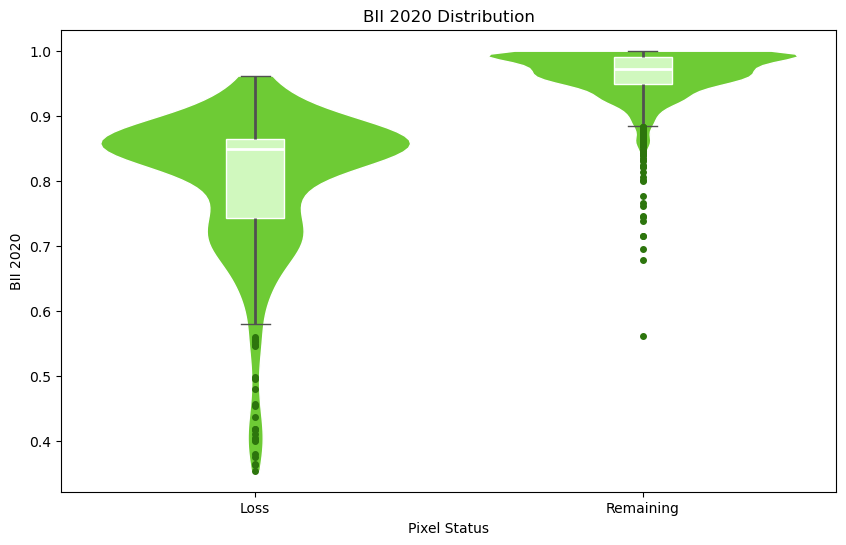

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure to create a copy and add the 'Status' column
loss_df_copy = loss_df.copy()
loss_df_copy['Status'] = 'Loss'

remain_df_copy = remain_df.copy()
remain_df_copy['Status'] = 'Remaining'

# Combine into one DataFrame
df = pd.concat([loss_df_copy, remain_df_copy], axis=0)

plt.figure(figsize=(10,6))

# Define pastel palette (valid hex codes)
pastel_palette = {'Loss': '#68E41C', 'Remaining': '#68E41C'}

# Violin plot
sns.violinplot(
    x='Status',
    y='BII2020',
    data=df,
    palette=pastel_palette,
    inner=None,
    cut=0,
    linewidth=1,          # thickness of the violin edge
    edgecolor='WHITE'     # outline color
)

# Boxplot inside
sns.boxplot(
    x='Status',
    y='BII2020',
    data=df,
    width=0.15,
    showcaps=True,
    showfliers=True,
    boxprops={'facecolor':'#D0F8BE', 'edgecolor':'white'},
    whiskerprops={'linewidth':2},
    medianprops={'color':'white', 'linewidth':2},
    flierprops={
        'marker':'o',
        'markerfacecolor':'#2D750D',
        'markeredgecolor':'#2D750D',
        'markersize':4
    }
)

plt.title('BII 2020 Distribution')
plt.xlabel('Pixel Status')
plt.ylabel('BII 2020')
plt.show()


In [10]:
from scipy.stats import mannwhitneyu

# Run Mann-Whitney U test
u_stat, p_value = mannwhitneyu(loss_df['BII2020'], 
                               remain_df['BII2020'], 
                               alternative='two-sided')  # use 'less' if you specifically expect loss < remain

print("Mann-Whitney U statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U statistic: 25788.0
p-value: 1.2300396944735583e-229


In [13]:
# Top Drivers
url_d = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/Driver_BII.csv"
driver = pd.read_csv(url_d)

HTTPError: HTTP Error 404: Not Found

In [ ]:
driver.head(3)

In [ ]:
# Create separate dataframes for each driver
agriculture_df = driver[driver['driver'] == 'Permanent Agriculture'].copy()
hcommodities_df = driver[driver['driver'] == 'Hard commodities'].copy()
shiftingc_df = driver[driver['driver'] == 'Shifting cultivation'].copy()
logging_df = driver[driver['driver'] == 'Logging'].copy()
Wildfire_df = driver[driver['driver'] == 'Wildfire'].copy()

In [ ]:
# Store DataFrames in a dictionary
driver_dfs = {
    'Permanent Agriculture': agriculture_df,
    'Hard commodities': hcommodities_df,
    'Shifting cultivation': shiftingc_df,
    'Logging': logging_df,
    'Wildfire': Wildfire_df
}

# Loop through each driver and print summary
for driver_name, df in driver_dfs.items():
    print(f"--- {driver_name} Summary ---")
    print(df.describe(include='all'))  # include='all' gives stats for numeric and non-numeric columns
    print("\n")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of samples per driver
driver_counts = driver['driver'].value_counts()

# Matplotlib version
plt.figure(figsize=(8,5))
driver_counts.plot(kind='bar', color='skyblue', fontsize = 9)
plt.title('Number of Samples per Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of BII2020 by driver (highlighting two drivers, you can adjust palette)
plt.figure(figsize=(8,6))
sns.boxplot(x='driver', y='BII2020', data=driver, palette=['red', 'green', 'skyblue', 'orange', 'purple'])
plt.title('Biodiversity Intactness Index (2020) by Forest Status')
plt.xlabel('Driver')
plt.ylabel('BII 2020')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10,6))

# Density plot of BII2020 for each driver
sns.kdeplot(data=driver, x="BII2020", hue="driver", common_norm=False, fill=True, alpha=0.3)

plt.title("Density of BII2020 across Drivers")
plt.xlabel("BII2020")
plt.ylabel("Density")
plt.legend(title="Driver")
plt.show()

In [ ]:
from scipy.stats import kruskal

# Extract BII2020 values for each group
agriculture_vals = agriculture_df['BII2020'].values
hcommodities_vals = hcommodities_df['BII2020'].values
shiftingc_vals = shiftingc_df['BII2020'].values
logging_vals = logging_df['BII2020'].values
wildfire_vals = Wildfire_df['BII2020'].values

# Perform Kruskal-Wallis H-test
stat, p = kruskal(agriculture_vals, hcommodities_vals, shiftingc_vals, logging_vals, wildfire_vals)

print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")
